In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
matplotlib.style.use('seaborn-talk')
matplotlib.style.use('fivethirtyeight');

import os

In [2]:
import geopandas as gpd

In [3]:
rio = gpd.read_file('Rio Rancho Police Department.geojson')

In [4]:
rio.shape

(451402, 20)

https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8

In [5]:
rio.columns

Index(['city', 'latitude', 'parent_incident_type', 'zip', 'state',
       'day_of_week', 'incident_id', 'clearance_type', 'incident_description',
       'country', 'longitude', 'address_2', 'hour_of_day', 'created_at',
       'address_1', 'incident_type_primary', 'updated_at', 'case_number',
       'incident_datetime', 'geometry'],
      dtype='object')

In [6]:
rio.geometry.head()

0    POINT (-106.6963095 35.2252501)
1     POINT (-106.6877598 35.227701)
2    POINT (-106.6769924 35.2415928)
3    POINT (-106.5907039 35.3312074)
4    POINT (-106.6768927 35.2584993)
Name: geometry, dtype: object

Let's load the RR streetnetwork from OSM

In [7]:
import osmnx as ox
G = ox.graph_from_place('Rio Rancho, New Mexico', network_type='drive')

In [8]:
ox.save_graph_shapefile(G, 'openstreetmap_riorancho', folder='.')

/anaconda3/envs/geopandas/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING
CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING


In [10]:
streets = gpd.read_file('openstreetmap_riorancho/edges/')

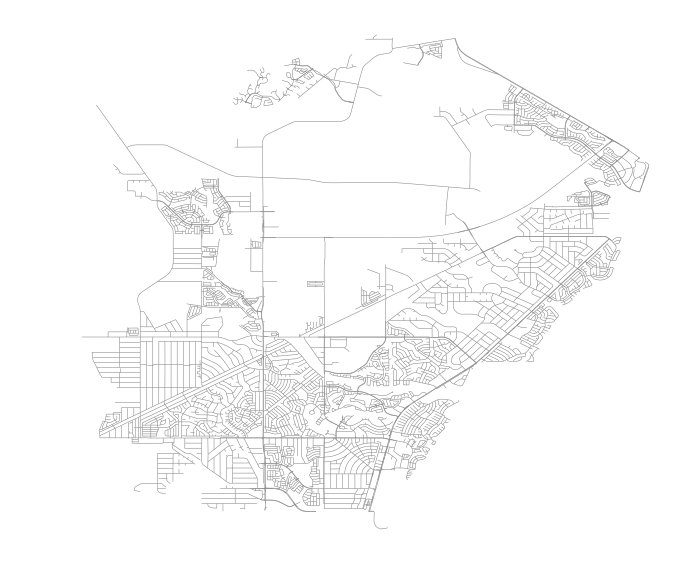

In [11]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15,10))
#stations.plot(ax=ax, markersize=20)
ax.set_axis_off()

In [12]:
streets.crs

{'init': 'epsg:4326'}

In [13]:
rio.crs

{'init': 'epsg:4326'}